# Counties killings


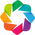

In [50]:
# Pandas import
import pandas as pd

# Bokeh import, only dataset
from bokeh.sampledata.us_counties import data as counties

# Holoview
import holoviews as hv
hv.extension('bokeh')


def plot_state_counties(state_code, display_map=True):
    from bokeh.sampledata.us_counties import data as counties

    data = pd.read_csv('../data/fatalencounters.csv')
    state = data[data['Location of death (state)'] == state_code]
    state_counties = state['Location of death (county)'].value_counts()

    counties = {
        code: county for code, county in counties.items() if county["state"] == state_code.lower()
    }

    county_xs = [county["lons"] for county in counties.values()]
    county_ys = [county["lats"] for county in counties.values()]

    county_names = [county['name'] for county in counties.values()]

    # The Data that we calculated using Pandas
    county_values = [state_counties[county] if county in state_counties else 0  for county in county_names]


    county_polys = {name: hv.Polygons((xs, ys), level=rate, vdims=['Killings'])
                    for name, xs, ys, rate in zip(county_names, county_xs, county_ys, county_values)}

    choropleth = hv.NdOverlay(county_polys, kdims=['County'])
    plot_opts = dict(logz=True, tools=['hover'], xaxis=None, yaxis=None,
                 show_grid=False, show_frame=False)
    style = dict(line_color='white')
    c = choropleth({'Polygons': {'style': style, 'plot': plot_opts}})
    if display_map:
        display(c)
    else:
        return c

In [46]:
data['Location of death (state)'].unique()

array(['CA', 'GA', 'PA', 'AL', 'IL', 'NC', 'NE', 'OH', 'UT', 'FL', 'OK',
       'TX', 'AZ', 'MS', 'KS', 'NV', 'NY', 'ME', 'MO', 'AR', 'NM', 'HI',
       'NJ', 'RI', 'MI', 'LA', 'MD', 'CO', 'MN', 'SC', 'WA', 'WI', 'WY',
       'VT', 'TN', 'AK', 'OR', 'MA', 'MT', 'IA', 'ID', 'KY', 'CT', 'VA',
       'DE', 'DC', 'ND', 'IN', 'WV', 'NH', 'SD', nan], dtype=object)

In [51]:
plot_state_counties('IN')

:NdOverlay   [County]
   :Polygons   [x,y]   (Killings)

In [48]:
import ipywidgets.widgets as w

In [ ]:
w.

In [39]:
from ipywidgets import interact
from ipywidgets.widgets import Dropdown

In [52]:
states_codes = data['Location of death (state)'].dropna().unique().tolist()

states_dropdown = Dropdown(
    options=states_codes,
    value=states_codes[0],
    description='State:',
    disabled=False
)

interact(plot_state_counties, state_code=states_dropdown)

<function __main__.plot_state_counties>